# GATHERING

In [1]:
pip install tweepy

In [106]:
#inportation of all libaries
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
from IPython.display import Image


### Enhanced Twitter Archive

In [3]:
#import of the enhanced twitter archieve dataset
twitter_archive_enhanced=pd.read_csv(r'C:\Users\Samuel\Desktop\ALX\Dataset\twitter-archive-enhanced.csv')

In [4]:
twitter_archive_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


### Image Predictions Datset

In [5]:
#import of the image prediction dataset by use of the request get method
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)

In [6]:
#creatation of a folder and we checck if it is already existing
folder_name = 'image_prediction'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [7]:
with open(os.path.join(folder_name,url.split('/')[-1]),mode='wb') as file:
        file.write(response.content)

In [8]:
#confirmation of the file if it is saved
os.listdir(folder_name)

['image-predictions.tsv']

In [9]:
#read the file using pandas 
image_prediction=pd.read_csv('image_prediction\image-predictions.tsv',sep='\t')

In [10]:
#view the image prediction dataset
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [11]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


## Additional data from the Twitter API

In [12]:
#gathering of the twitter api and we get only the tweet ID, retweet count and favourite count valaues only
df_list=[]
count=0
jsonfile='tweet-json.txt'
with open(jsonfile, encoding='utf-8') as file:
    for the_file in file:
        count +=1
        json_file=file.readline()
        mydata=(json.loads(the_file))
        tweet_id=mydata['id']
        retweet_count=mydata['retweet_count']
        favorite_count=mydata['favorite_count']
        df_list.append({'tweet_id':tweet_id,'retweet_count':retweet_count,'favorite_count':favorite_count})
        
        twitter_api=pd.DataFrame(df_list,columns=['tweet_id','retweet_count','favorite_count'])

# ACCESSING

#### Twitter Archive Enhanced

In [13]:
#we view only the first five rows
twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [14]:
#we randomly view 10 rows of the dataset
twitter_archive_enhanced.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
687,788039637453406209,NaN,NaN,2016-10-17 15:31:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Did... did they pick out that license plate? 1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/788039637...,12,10,None,None,None,None,None
1696,681242418453299201,NaN,NaN,2015-12-27 22:37:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Champ. He's being sacrificed to the Az...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681242418...,10,10,Champ,None,None,None,None
932,754011816964026368,NaN,NaN,2016-07-15 17:56:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He pouts until he gets to go ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/754011816...,12,10,Charlie,None,None,None,None
853,765371061932261376,NaN,NaN,2016-08-16 02:14:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Louie. He's had a long day. Did a lot ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/765371061...,11,10,Louie,None,None,pupper,None
698,786363235746385920,NaN,NaN,2016-10-13 00:29:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rizzo. He has many talents. A true ren...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/786363235...,13,10,Rizzo,doggo,None,None,None
1427,697630435728322560,NaN,NaN,2016-02-11 03:57:11 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Pls make sure ur dogs have gone through some b...,NaN,NaN,NaN,https://vine.co/v/in7ZzHPKzWz,8,10,None,None,None,None,None
2255,667773195014021121,NaN,NaN,2015-11-20 18:35:10 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is a rare Hungarian Pinot named Jessiga. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667773195...,8,10,a,None,None,None,None
2092,670782429121134593,NaN,NaN,2015-11-29 01:52:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This dude slaps your girl's ass what do you do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670782429...,5,10,None,None,None,None,None
2302,667012601033924608,NaN,NaN,2015-11-18 16:12:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Klevin. He laughs a lot. Very cool dog...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667012601...,9,10,Klevin,None,None,None,None
1722,680115823365742593,NaN,NaN,2015-12-24 20:00:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ozzy. He woke up 2 minutes before he h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680115823...,9,10,Ozzy,None,None,None,None


In [15]:
#we get the information of the dataset about the datatype,count and the total entries for tthe dataset
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [16]:
#This help us understand the datset better by viewing the mean,standard deviation, maximumm etc 
twitter_archive_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [17]:
#check for duplicates
twitter_archive_enhanced.duplicated().value_counts()

False    2356
dtype: int64

In [18]:
# we still attempt other method to checck for dduplicated in the tweet ID column
twitter_archive_enhanced.tweet_id.nunique()

2356

In [19]:
#we check if for the retweet status column tthere exist empty values
twitter_archive_enhanced.retweeted_status_user_id.isna().value_counts()

True     2175
False     181
Name: retweeted_status_user_id, dtype: int64

In [20]:
# We get the sum of each columns having empty or null values
twitter_archive_enhanced.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [21]:
# we view the twitter rating numerators to check if there are problems
twitter_archive_enhanced.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [22]:
# we view the twitter rating denominators to check if there are problems
twitter_archive_enhanced.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [23]:
#we view regualar expression that may be having conflicing values on the numerators or denominators
with pd.option_context('max_colwidth', 200):
    display(twitter_archive_enhanced[twitter_archive_enhanced['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

C:\Users\Samuel\AppData\Local\Temp\ipykernel_180408\275478000.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  display(twitter_archive_enhanced[twitter_archive_enhanced['text'].str.contains(r"(\d+\.\d*\/\d+)")]


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [24]:
#we attempt to view the unique values of the dog age grouping
group=twitter_archive_enhanced[['doggo','floofer','pupper','puppo']]

In [25]:
group.value_counts().nunique

<bound method IndexOpsMixin.nunique of doggo  floofer  pupper  puppo
None   None     None    None     1976
                pupper  None      245
doggo  None     None    None       83
None   None     None    puppo      29
doggo  None     pupper  None       12
None   floofer  None    None        9
doggo  None     None    puppo       1
       floofer  None    None        1
dtype: int64>

#### Image Prediction

In [26]:
#we view the image prediction value for the top 5 entries
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [27]:
#we get the information of the dataset about the datatype,count and the total entries for tthe dataset
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


array([[<AxesSubplot:title={'center':'tweet_id'}>,
        <AxesSubplot:title={'center':'img_num'}>],
       [<AxesSubplot:title={'center':'p1_conf'}>,
        <AxesSubplot:title={'center':'p2_conf'}>],
       [<AxesSubplot:title={'center':'p3_conf'}>, <AxesSubplot:>]],
      dtype=object)

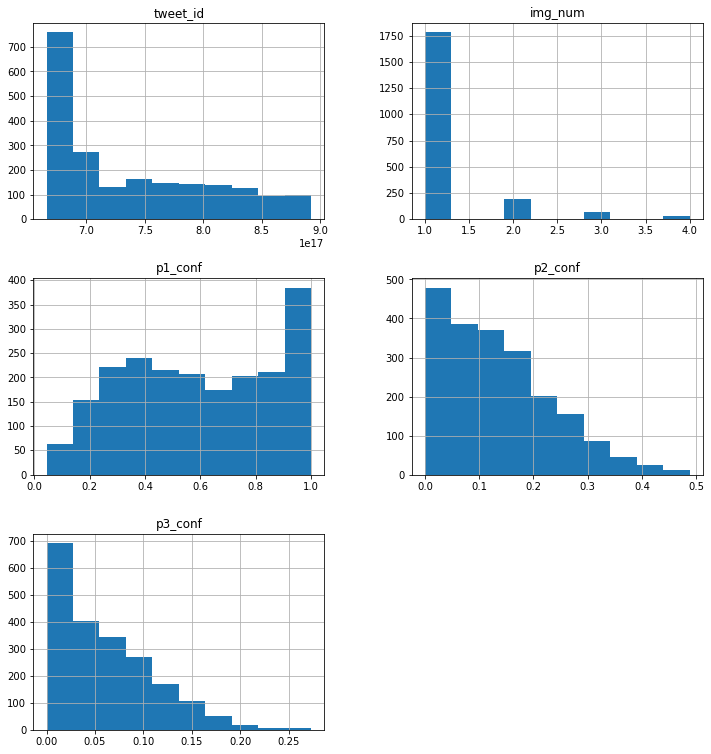

In [28]:
#we try to understand the dataset better by viewing the histogram for each coolumn 
image_prediction.hist(figsize=(12,13))

In [29]:
#to check is there is null value in each column
image_prediction.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [30]:
#to check if there is duplicated images in the column
image_prediction.jpg_url.duplicated(keep=False).value_counts()

False    1943
True      132
Name: jpg_url, dtype: int64

In [31]:
#To check for the count of each value in the image number column
image_prediction.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [32]:
# number of unique tweet id 
image_prediction.tweet_id.nunique()

2075

In [33]:
#check if there exist duplicates in the tweet id column
image_prediction.tweet_id.duplicated(keep=False).value_counts()


False    2075
Name: tweet_id, dtype: int64

In [34]:
##check if there exist duplicates in the p1 dog column

image_prediction.p1_dog.duplicated(keep=False).value_counts()

True    2075
Name: p1_dog, dtype: int64

In [35]:
##check if there exist duplicates in the p2 dog column

image_prediction.p2_dog.duplicated(keep=False).value_counts()

True    2075
Name: p2_dog, dtype: int64

In [36]:
##check if there exist duplicates in the p3 dog column

image_prediction.p3_dog.duplicated(keep=False).value_counts()


True    2075
Name: p3_dog, dtype: int64

In [37]:
image_prediction[["p1_dog","p2_dog","p3_dog"]].apply(lambda x:
    (x[0] == False and x[1] == False and x[2] == False) 
    , axis = 1).value_counts()

False    1751
True      324
dtype: int64

#### Twitter API

In [38]:
twitter_api.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,891815181378084864,4328,25461
2,891327558926688256,9774,41048
3,890971913173991426,2158,12041
4,890609185150312448,4429,28226


In [39]:
# to view the information for the dataset
twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        1177 non-null   int64
 1   retweet_count   1177 non-null   int64
 2   favorite_count  1177 non-null   int64
dtypes: int64(3)
memory usage: 27.7 KB


In [40]:
#to ccheck if there is null values in the dataset
twitter_api.isna().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

In [41]:
# check for duplicates on the tweet id column
twitter_api.tweet_id.duplicated().sum()

0

In [42]:
#to check the shape of the dataset
twitter_api.shape

(1177, 3)

# CLEANING

#### twitter_archive_enhanced

In [43]:
#making a copy of this dataset for reference purpose
twitter_archive_enhanced_cleaning=twitter_archive_enhanced.copy()


In [44]:
twitter_archive_enhanced_cleaning = twitter_archive_enhanced_cleaning[pd.isnull(twitter_archive_enhanced_cleaning['retweeted_status_user_id'])]

In [45]:
twitter_archive_enhanced_cleaning.retweeted_status_user_id.value_counts().sum()

0

In [46]:
#we drop all unneessary columns to reduce the size
twitter_archive_enhanced_cleaning=twitter_archive_enhanced_cleaning.drop(['in_reply_to_status_id','in_reply_to_user_id','source','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls'],axis=1)

In [47]:
twitter_archive_enhanced_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   text                2175 non-null   object
 3   rating_numerator    2175 non-null   int64 
 4   rating_denominator  2175 non-null   int64 
 5   name                2175 non-null   object
 6   doggo               2175 non-null   object
 7   floofer             2175 non-null   object
 8   pupper              2175 non-null   object
 9   puppo               2175 non-null   object
dtypes: int64(3), object(7)
memory usage: 186.9+ KB


In [48]:
with pd.option_context('max_colwidth', 200):
    display(twitter_archive_enhanced_cleaning[twitter_archive_enhanced_cleaning['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

C:\Users\Samuel\AppData\Local\Temp\ipykernel_180408\1042792891.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  display(twitter_archive_enhanced_cleaning[twitter_archive_enhanced_cleaning['text'].str.contains(r"(\d+\.\d*\/\d+)")]


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [49]:
# we manuallyy change the numerators that are wrongly gathered based on the values on the text
twitter_archive_enhanced_cleaning.loc[twitter_archive_enhanced_cleaning.tweet_id==883482846933004288,'rating_numerator']=13.5
twitter_archive_enhanced_cleaning.loc[twitter_archive_enhanced_cleaning.tweet_id==681340665377193984,'rating_numerator']=9.5
twitter_archive_enhanced_cleaning.loc[twitter_archive_enhanced_cleaning.tweet_id==680494726643068929,'rating_numerator']=11.26
twitter_archive_enhanced_cleaning.loc[twitter_archive_enhanced_cleaning.tweet_id==786709082849828864,'rating_numerator']=9.75
twitter_archive_enhanced_cleaning.loc[twitter_archive_enhanced_cleaning.tweet_id==778027034220126208,'rating_numerator']=11.27


In [50]:
# we create a rating column which is the division of the nemerator and denomiator
twitter_archive_enhanced_cleaning['rating']=twitter_archive_enhanced_cleaning.rating_numerator/twitter_archive_enhanced_cleaning.rating_denominator
twitter_archive_enhanced_cleaning

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,None,None,None,None,1.3
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13.0,10,Tilly,None,None,None,None,1.3
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,None,None,None,None,1.2
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13.0,10,Darla,None,None,None,None,1.3
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12.0,10,Franklin,None,None,None,None,1.2
...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50 +0000,Here we have a 1949 1st generation vulpix. Enj...,5.0,10,None,None,None,None,None,0.5
2352,666044226329800704,2015-11-16 00:04:52 +0000,This is a purebred Piers Morgan. Loves to Netf...,6.0,10,a,None,None,None,None,0.6
2353,666033412701032449,2015-11-15 23:21:54 +0000,Here is a very happy pup. Big fan of well-main...,9.0,10,a,None,None,None,None,0.9
2354,666029285002620928,2015-11-15 23:05:30 +0000,This is a western brown Mitsubishi terrier. Up...,7.0,10,a,None,None,None,None,0.7


In [51]:
# we create a column which conatins  the differnt age group of the dogs
twitter_archive_enhanced_cleaning=pd.melt(twitter_archive_enhanced_cleaning,id_vars=['tweet_id','timestamp','text','rating_numerator','rating_denominator','name','rating'],value_vars=['doggo','floofer','pupper','puppo'],value_name='dog_group')

In [52]:
twitter_archive_enhanced_cleaning.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,rating,variable,dog_group
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,1.3,doggo,None
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13.0,10,Tilly,1.3,doggo,None
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,1.2,doggo,None
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13.0,10,Darla,1.3,doggo,None
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12.0,10,Franklin,1.2,doggo,None


In [53]:
#we  drop the variable column
twitter_archive_enhanced_cleaning.drop('variable', inplace=True,axis=1)

In [54]:
#we confirm that the column for variable is droped
twitter_archive_enhanced_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8700 entries, 0 to 8699
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            8700 non-null   int64  
 1   timestamp           8700 non-null   object 
 2   text                8700 non-null   object 
 3   rating_numerator    8700 non-null   float64
 4   rating_denominator  8700 non-null   int64  
 5   name                8700 non-null   object 
 6   rating              8700 non-null   float64
 7   dog_group           8700 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 543.9+ KB


In [55]:
# we sort the dog group column and then drop all duplicates that exist because of the dog_group column created
twitter_archive_enhanced_cleaning=twitter_archive_enhanced_cleaning.sort_values('dog_group')

In [56]:
twitter_archive_enhanced_cleaning=twitter_archive_enhanced_cleaning.drop_duplicates(subset='tweet_id', keep='last')

In [57]:
twitter_archive_enhanced_cleaning.dog_group.value_counts()

None       1831
pupper      234
doggo        75
puppo        25
floofer      10
Name: dog_group, dtype: int64

In [58]:
twitter_archive_enhanced_cleaning.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,rating,dog_group
2095,667443425659232256,2015-11-19 20:44:47 +0000,Exotic dog here. Long neck. Weird paws. Obsess...,6.0,10,None,0.6,None
2094,667453023279554560,2015-11-19 21:22:56 +0000,Meet Cupcake. I would do unspeakable things fo...,11.0,10,Cupcake,1.1,None
2093,667455448082227200,2015-11-19 21:32:34 +0000,This is Reese and Twips. Reese protects Twips....,7.0,10,Reese,0.7,None
2092,667470559035432960,2015-11-19 22:32:36 +0000,This is a northern Wahoo named Kohl. He runs t...,11.0,10,a,1.1,None
2091,667491009379606528,2015-11-19 23:53:52 +0000,Two dogs in this one. Both are rare Jujitsu Py...,7.0,10,None,0.7,None


In [59]:
twitter_archive_enhanced_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 2095 to 7298
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2175 non-null   int64  
 1   timestamp           2175 non-null   object 
 2   text                2175 non-null   object 
 3   rating_numerator    2175 non-null   float64
 4   rating_denominator  2175 non-null   int64  
 5   name                2175 non-null   object 
 6   rating              2175 non-null   float64
 7   dog_group           2175 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 152.9+ KB


#### Image Prediction

In [60]:
# we cretae a copy of the image prediction dataset
image_prediction_cleaning=image_prediction.copy()

In [61]:
#we view randomly the image prediction dataset
image_prediction_cleaning.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
178,669216679721873412,https://pbs.twimg.com/media/CUmJBS5WUAAKtrP.jpg,1,golden_retriever,0.992758,True,Irish_setter,0.003379,True,Saluki,0.001230,True
1033,711694788429553666,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False
298,671485057807351808,https://pbs.twimg.com/media/CVGYGNYXAAAQ9m-.jpg,1,Samoyed,0.627901,True,Great_Pyrenees,0.276421,True,kuvasz,0.057874,True
758,688789766343622656,https://pbs.twimg.com/media/CY8SocAWsAARuyh.jpg,1,American_Staffordshire_terrier,0.599660,True,Staffordshire_bullterrier,0.380976,True,bull_mastiff,0.003889,True
1310,754120377874386944,https://pbs.twimg.com/media/CncseIzWgAA4ghH.jpg,1,chow,0.168909,True,Norfolk_terrier,0.129114,True,Pomeranian,0.120822,True
1788,829861396166877184,https://pbs.twimg.com/media/C4RCiIHWYAAwgJM.jpg,1,Border_terrier,0.394486,True,Staffordshire_bullterrier,0.376574,True,American_Staffordshire_terrier,0.031292,True
1724,819952236453363712,https://pbs.twimg.com/media/C2EONHNWQAUWxkP.jpg,1,American_Staffordshire_terrier,0.925505,True,Staffordshire_bullterrier,0.036221,True,Italian_greyhound,0.020412,True
1395,767754930266464257,https://pbs.twimg.com/media/CqedCQWWgAIab9L.jpg,1,vizsla,0.307794,True,fountain,0.142185,False,Chesapeake_Bay_retriever,0.113903,True
1924,857263160327368704,https://pbs.twimg.com/media/C-WcS4MXoAADrBU.jpg,1,Samoyed,0.998021,True,Pomeranian,0.000922,True,keeshond,0.000311,True
725,686050296934563840,https://pbs.twimg.com/media/CYVXBb9WsAAwL3p.jpg,1,Pomeranian,0.985789,True,keeshond,0.004083,True,Pekinese,0.003334,True


In [62]:
#we create dog_breed that checks for the best predicted value is p1 then prints it else it checks for others
def predicted_image(image_prediction_cleaning):
    if image_prediction_cleaning.p1_dog==True:
        return image_prediction_cleaning.p1
    elif image_prediction_cleaning.p2_dog==True:
        return image_prediction_cleaning.p2
    elif image_prediction_cleaning.p3_dog==True:
        return image_prediction_cleaning.p3
    else:
        return 'Error'

In [63]:
image_prediction_cleaning['dog_breed']=image_prediction_cleaning.apply(predicted_image,axis=1)

In [64]:
#we create dog_breed that checks for the best predicted confidence level is p1 then prints it's value else it checks for others
def predicted_confidence(image_prediction_cleaning):
    if image_prediction_cleaning['p1_dog']==True:
        return image_prediction_cleaning.p1_conf
    elif image_prediction_cleaning.p2_dog==True:
        return image_prediction_cleaning.p2_conf
    elif image_prediction_cleaning.p3_dog==True:
        return image_prediction_cleaning.p3_conf
    else:
        return 'error'

In [65]:
image_prediction_cleaning['Confidence_level']=image_prediction_cleaning.apply(predicted_confidence,axis=1)

In [66]:
image_prediction_cleaning.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed,Confidence_level
854,696488710901260288,https://pbs.twimg.com/media/CapsyfkWcAQ41uC.jpg,1,briard,0.369063,True,Scotch_terrier,0.168204,True,giant_schnauzer,1.205530e-01,True,briard,0.369063
894,699434518667751424,https://pbs.twimg.com/media/CbTj--1XEAIZjc_.jpg,1,golden_retriever,0.836572,True,kuvasz,0.105946,True,Labrador_retriever,2.514390e-02,True,golden_retriever,0.836572
630,680934982542561280,https://pbs.twimg.com/media/CXMqwIQWcAA2iE0.jpg,1,Labrador_retriever,0.784398,True,Siberian_husky,0.055925,True,beagle,2.275010e-02,True,Labrador_retriever,0.784398
971,706593038911545345,https://pbs.twimg.com/media/Cc5Snc7XIAAMidF.jpg,1,four-poster,0.696423,False,quilt,0.189312,False,pillow,2.940880e-02,False,Error,error
816,692828166163931137,https://pbs.twimg.com/media/CZ1riVOWwAATfGf.jpg,1,Samoyed,0.985857,True,Arctic_fox,0.007852,False,white_wolf,3.277700e-03,False,Samoyed,0.985857
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever,0.775930,True,Tibetan_mastiff,0.093718,True,Labrador_retriever,7.242660e-02,True,golden_retriever,0.77593
400,673688752737402881,https://pbs.twimg.com/media/CVlsVs3WIAAja6m.jpg,1,soft-coated_wheaten_terrier,0.340806,True,Sealyham_terrier,0.234898,True,kuvasz,2.034950e-01,True,soft-coated_wheaten_terrier,0.340806
57,667073648344346624,https://pbs.twimg.com/media/CUHr8WbWEAEBPgf.jpg,1,Chihuahua,0.483682,True,pug,0.092494,True,Brabancon_griffon,5.749540e-02,True,Chihuahua,0.483682
1557,793226087023144960,https://pbs.twimg.com/media/CwIa5CjW8AErZgL.jpg,1,wire-haired_fox_terrier,0.456047,True,Lakeland_terrier,0.273428,True,English_springer,8.364330e-02,True,wire-haired_fox_terrier,0.456047
1760,825876512159186944,https://pbs.twimg.com/media/C3YaSnQWAAILgz0.jpg,1,shopping_cart,0.995941,False,shopping_basket,0.004057,False,mousetrap,8.832830e-07,False,Error,error


In [67]:
#https://www.shanelynn.ie/pandas-drop-delete-dataframe-rows-columns/
#we check to be sure that the error values in the dog_breed column is removed
image_prediction_cleaning=image_prediction_cleaning.loc[image_prediction_cleaning['dog_breed']!= 'Error']

In [68]:
image_prediction_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          1751 non-null   int64  
 1   jpg_url           1751 non-null   object 
 2   img_num           1751 non-null   int64  
 3   p1                1751 non-null   object 
 4   p1_conf           1751 non-null   float64
 5   p1_dog            1751 non-null   bool   
 6   p2                1751 non-null   object 
 7   p2_conf           1751 non-null   float64
 8   p2_dog            1751 non-null   bool   
 9   p3                1751 non-null   object 
 10  p3_conf           1751 non-null   float64
 11  p3_dog            1751 non-null   bool   
 12  dog_breed         1751 non-null   object 
 13  Confidence_level  1751 non-null   object 
dtypes: bool(3), float64(3), int64(2), object(6)
memory usage: 169.3+ KB


In [69]:
# we check for the list of the dataset so as to nable us drop unecessary columns
list(image_prediction_cleaning)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'dog_breed',
 'Confidence_level']

In [70]:
# we dropp all columns that we will not be using
image_prediction_cleaning=image_prediction_cleaning.drop(columns={'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog'},axis=1)

In [71]:
image_prediction_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          1751 non-null   int64 
 1   jpg_url           1751 non-null   object
 2   img_num           1751 non-null   int64 
 3   dog_breed         1751 non-null   object
 4   Confidence_level  1751 non-null   object
dtypes: int64(2), object(3)
memory usage: 82.1+ KB


#### Twitter API

In [72]:
#we make a copy of the twiter api 
twitter_api_cleaning=twitter_api.copy()

In [73]:
twitter_api_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        1177 non-null   int64
 1   retweet_count   1177 non-null   int64
 2   favorite_count  1177 non-null   int64
dtypes: int64(3)
memory usage: 27.7 KB


In [74]:
#we create a new datframe that is used to merge the three dataset
df=pd.merge(pd.merge(twitter_archive_enhanced_cleaning,image_prediction_cleaning, on='tweet_id',how='outer'),twitter_api, on='tweet_id',how='outer')

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2295 entries, 0 to 2294
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2295 non-null   int64  
 1   timestamp           2175 non-null   object 
 2   text                2175 non-null   object 
 3   rating_numerator    2175 non-null   float64
 4   rating_denominator  2175 non-null   float64
 5   name                2175 non-null   object 
 6   rating              2175 non-null   float64
 7   dog_group           2175 non-null   object 
 8   jpg_url             1751 non-null   object 
 9   img_num             1751 non-null   float64
 10  dog_breed           1751 non-null   object 
 11  Confidence_level    1751 non-null   object 
 12  retweet_count       1177 non-null   float64
 13  favorite_count      1177 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 268.9+ KB


In [76]:
#we drop duplicates of the tweet_id
df=df.drop_duplicates('tweet_id')

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2295 entries, 0 to 2294
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2295 non-null   int64  
 1   timestamp           2175 non-null   object 
 2   text                2175 non-null   object 
 3   rating_numerator    2175 non-null   float64
 4   rating_denominator  2175 non-null   float64
 5   name                2175 non-null   object 
 6   rating              2175 non-null   float64
 7   dog_group           2175 non-null   object 
 8   jpg_url             1751 non-null   object 
 9   img_num             1751 non-null   float64
 10  dog_breed           1751 non-null   object 
 11  Confidence_level    1751 non-null   object 
 12  retweet_count       1177 non-null   float64
 13  favorite_count      1177 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 268.9+ KB


In [78]:
#we check if the text has duplicates then we count them
df.text.duplicated().value_counts()

False    2176
True      119
Name: text, dtype: int64

## Storing

In [79]:
#we store the new datset into a new file termed twitter_archive_master_csv
df.to_csv('twitter_archive_master_csv',index=False,header=False,encoding='utf-8')

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2295 entries, 0 to 2294
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2295 non-null   int64  
 1   timestamp           2175 non-null   object 
 2   text                2175 non-null   object 
 3   rating_numerator    2175 non-null   float64
 4   rating_denominator  2175 non-null   float64
 5   name                2175 non-null   object 
 6   rating              2175 non-null   float64
 7   dog_group           2175 non-null   object 
 8   jpg_url             1751 non-null   object 
 9   img_num             1751 non-null   float64
 10  dog_breed           1751 non-null   object 
 11  Confidence_level    1751 non-null   object 
 12  retweet_count       1177 non-null   float64
 13  favorite_count      1177 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 268.9+ KB


### Analysis 

In [81]:
#We checks for the counts of each dog age group
df.dog_group.value_counts()

None       1831
pupper      234
doggo        75
puppo        25
floofer      10
Name: dog_group, dtype: int64

In [179]:
df2=df.query("dog_breed=='golden_retriever'")
df2.jpg_url.sample(4)

531    https://pbs.twimg.com/media/CfN23ArXEAEkZkz.jpg
165    https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg
520    https://pbs.twimg.com/media/Ce6b4MPWwAA22Xm.jpg
469    https://pbs.twimg.com/media/CdjaSFCWAAAJZh3.jpg
Name: jpg_url, dtype: object

In [180]:
Image(url=' https://pbs.twimg.com/media/CfN23ArXEAEkZkz.jpg')

In [154]:
df3=df.query("dog_breed=='Scotch_terrier'")
df3.jpg_url.sample(1)

250    https://pbs.twimg.com/media/CZDT-mZWsAEK9BH.jpg
Name: jpg_url, dtype: object

In [155]:
Image(url='https://pbs.twimg.com/media/CZDT-mZWsAEK9BH.jpg')

Text(0.5, 1.0, 'Histogram showing top ten(10) dog breed per rating')

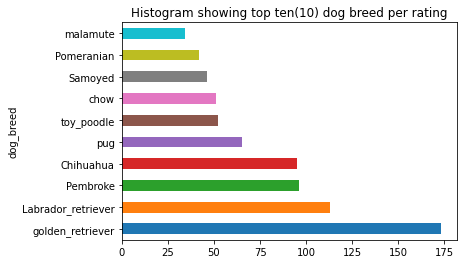

In [82]:
#we plot a barh chart to show the top 10 dog breeds based on rating
import plotly.express as px
colour=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
df_bar=df.groupby(['dog_breed'])['rating'].size().to_frame().sort_values(['rating'],ascending=False).head(10).reset_index().plot.barh(x='dog_breed',y='rating',color=colour,legend=False)
plt.xlabel=('rating for dog breeds')
plt.ylabel=('dog breed')
plt.title('Histogram showing top ten(10) dog breed per rating')

Text(0.5, 1.0, 'Histogram showing bottom ten(10) dog breed per rating')

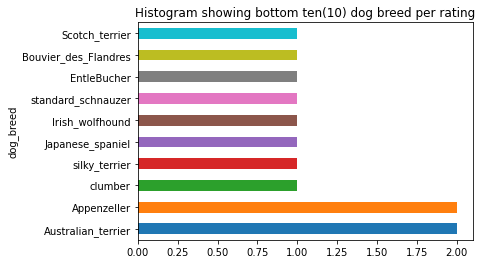

In [95]:
#we plot a barh chart to show the top 10 dog breeds based on rating
import plotly.express as px
colour=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
df_bar=df.groupby(['dog_breed'])['rating'].size().to_frame().sort_values(['rating'],ascending=False).tail(10).reset_index().plot.barh(x='dog_breed',y='rating',color=colour,legend=False)
plt.xlabel=('rating for dog breeds')
plt.ylabel=('dog breed')
plt.title('Histogram showing bottom ten(10) dog breed per rating')

Text(0.5, 1.0, 'Bar chart showing top ten(10) dog breed per favorite count')

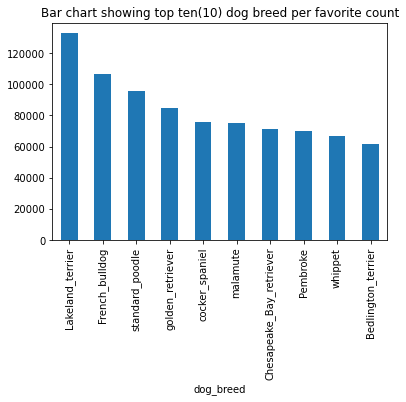

In [92]:
df.groupby(['dog_breed','favorite_count']).size().to_frame().sort_values(['favorite_count'],ascending=False).head(10).reset_index().plot.bar(y='favorite_count',x='dog_breed',legend=False)
plt.ylabel=('favorite count for dog breeds')
plt.xlabel=('dog breed')
plt.title('Bar chart showing top ten(10) dog breed per favorite count')

Text(0.5, 1.0, 'Bar chaart showing top ten(10) dog breed per retweet count')

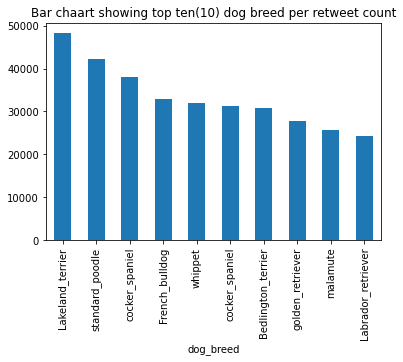

In [91]:
df.groupby(['dog_breed','retweet_count']).size().to_frame().sort_values(['retweet_count'],ascending=False).head(10).reset_index().plot.bar(y='retweet_count',x='dog_breed',legend=False)
plt.ylabel=('retweet count for dog breeds')
plt.xlabel=('dog breed')
plt.title('Bar chart showing top ten(10) dog breed per retweet count')

In [184]:
#we describe the data based on the dog group which will show the mean,median,standard deviation etc for each column
df.groupby('dog_breed').describe().sort_values(['dog_breed'],ascending=False).head(20).reset_index()

dog_breed tweet_id                              \
                                   count          mean           std   
0       wire-haired_fox_terrier      2.0  7.712716e+17  3.104838e+16   
1                       whippet     11.0  7.424905e+17  8.197479e+16   
2                        vizsla     14.0  7.417263e+17  7.746069e+16   
3                   toy_terrier      3.0  7.166375e+17  8.353425e+16   
4                    toy_poodle     52.0  7.219281e+17  5.140789e+16   
5            standard_schnauzer      1.0  6.757109e+17           NaN   
6               standard_poodle     12.0  7.471502e+17  6.372101e+16   
7   soft-coated_wheaten_terrier     15.0  7.038616e+17  4.393623e+16   
8                 silky_terrier      1.0  7.737047e+17           NaN   
9                    schipperke     15.0  7.389692e+17  6.438302e+16   
10                      redbone      6.0  7.103190e+17  4.646675e+16   
11                          pug     65.0  7.201528e+17  6.196293e+16   
12                     papillon      8.0  7.203468e+17  4.691528e+16   
13          miniature_schnauzer      5.0  7.014763e+17  6.568751e+16   
14             miniature_poodle      8.0  7.151542e+17  6.153907e+16   
15           miniature_pinscher     26.0  7.345660e+17  6.637056e+16   
16                     malinois     11.0  7.199779e+17  5.806896e+16   
17                     malamute     34.0  7.486789e+17  6.754450e+16   
18                       kuvasz     19.0  7.314310e+17  6.123118e+16   
19                     komondor      3.0  7.774009e+17  1.022299e+17   

                                                                          \
             min           25%           50%           75%           max   
0   7.493170e+17  7.602943e+17  7.712716e+17  7.822488e+17  7.932261e+17   
1   6.703857e+17  6.795164e+17  7.077415e+17  7.927156e+17  8.892788e+17   
2   6.671780e+17  6.749385e+17  7.155289e+17  7.999547e+17  8.790082e+17   
3   6.664188e+17  6.684229e+17  6.704270e+17  7.417469e+17  8.130668e+17   
4   6.671522e+17  6.737691e+17  7.073259e+17  7.552183e+17  8.369900e+17   
5   6.757109e+17  6.757109e+17  6.757109e+17  6.757109e+17  6.757109e+17   
6   6.684842e+17  6.862912e+17  7.467861e+17  7.994141e+17  8.512249e+17   
7   6.663738e+17  6.737976e+17  6.929016e+17  7.168097e+17  8.349316e+17   
8   7.737047e+17  7.737047e+17  7.737047e+17  7.737047e+17  7.737047e+17   
9   6.732130e+17  6.805473e+17  7.088458e+17  7.922573e+17  8.494123e+17   
10  6.660293e+17  6.693604e+17  7.054645e+17  7.475370e+17  7.660692e+17   
11  6.660829e+17  6.739569e+17  6.925353e+17  7.490644e+17  8.862584e+17   
12  6.673934e+17  6.878964e+17  7.006807e+17  7.550059e+17  7.983407e+17   
13  6.668178e+17  6.686314e+17  6.688727e+17  6.848002e+17  8.182595e+17   
14  6.660586e+17  6.702017e+17  6.774673e+17  7.684957e+17  8.145302e+17   
15  6.660492e+17  6.744938e+17  7.125994e+17  7.898675e+17  8.800958e+17   
16  6.688261e+17  6.738613e+17  6.997796e+17  7.536925e+17  8.228591e+17   
17  6.663533e+17  6.853753e+17  7.393977e+17  8.075376e+17  8.851676e+17   
18  6.677282e+17  6.905517e+17  7.074206e+17  7.535416e+17  8.867369e+17   
19  6.686367e+17  7.303434e+17  7.920501e+17  8.317830e+17  8.715159e+17   

   rating_numerator  ... retweet_count          favorite_count                \
              count  ...           75%      max          count          mean   
0               2.0  ...       3130.75   3338.0            2.0   8538.500000   
1              11.0  ...      16342.50  31989.0            3.0  24022.666667   
2              13.0  ...       2516.00   4046.0            4.0   6027.750000   
3               3.0  ...       1751.75   2276.0            2.0   4708.000000   
4              51.0  ...       2423.25  21324.0           26.0   6264.692308   
5               1.0  ...           NaN      NaN            0.0           NaN   
6              11.0  ...       1795.00  42228.0            9.0  15423.777778   
7              15.0  ...       1059.75   179